In [2]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify   


In [3]:
df = pd.read_csv("/kaggle/input/summer-olympics-medals-1896-2024/olympics_dataset.csv")
print(df.head())


   player_id                   Name Sex            Team  NOC  Year  Season  \
0          0              A Dijiang   M           China  CHN  1992  Summer   
1          1               A Lamusi   M           China  CHN  2012  Summer   
2          2            Gunnar Aaby   M         Denmark  DEN  1920  Summer   
3          3            Edgar Aabye   M  Denmark/Sweden  DEN  1900  Summer   
4         26  Cornelia (-strannood)   F     Netherlands  NED  1932  Summer   

          City       Sport                         Event     Medal  
0    Barcelona  Basketball   Basketball Men's Basketball  No medal  
1       London        Judo  Judo Men's Extra-Lightweight  No medal  
2    Antwerpen    Football       Football Men's Football  No medal  
3        Paris  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      Gold  
4  Los Angeles   Athletics  Athletics Women's 100 metres  No medal  


In [4]:
#first five rows
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [5]:
#last five rows
df.tail()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze
252564,1924402,Charlie Carvell,M,Great Britain,GBR,2024,Summer,Paris,Athletics,Men's 4 x 400m Relay,Bronze


In [6]:
#info abt each col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [7]:
df.describe()

,player_id,Year
count,2.525650e+05,252565.000000
mean,2.305499e+05,1981.743908
std,4.289330e+05,32.596548
min,0.000000e+00,1896.000000
25%,5.713700e+04,1960.000000
50%,1.356110e+05,1988.000000
75%,2.118590e+05,2008.000000
max,9.460001e+06,2024.000000


In [8]:
#total col names
df.columns

Index(['player_id', 'Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      dtype='object')

In [9]:
#datatypes of each col
df.dtypes

player_id     int64
Name         object
Sex          object
Team         object
NOC          object
Year          int64
Season       object
City         object
Sport        object
Event        object
Medal        object
dtype: object

In [10]:
#total rows and col
df.shape

(252565, 11)

In [11]:
#sum of null values in each col
df.isnull().sum()

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

In [12]:
#rename col
df.rename(columns={"Athlete": "Player_Name", "Country": "Nation"}, inplace=True)
df.columns


Index(['player_id', 'Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      dtype='object')

In [13]:
#col drop
df.drop(columns=["player_id"], inplace=True)
df.columns


Index(['Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [14]:
#add col
df["Remarks"] = None
df.columns


Index(['Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City', 'Sport',
       'Event', 'Medal', 'Remarks'],
      dtype='object')

In [15]:
#maximum year in dataset
df["Year"].max()


2024

In [16]:
#minimum year in dataset
df["Year"].min()


1896

In [17]:
#median of year column
df["Year"].median()


1988.0

In [18]:
#count of all athletes
df["Name"].count()


252565

In [19]:
# counts total duplicates
df.duplicated().sum()


1466

In [20]:
#drop the duplicates
df.drop_duplicates()


,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,Remarks
0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,None
1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,None
2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,None
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,None
4,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,None
...,...,...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal,None
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal,None
252562,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold,None
252563,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze,None


In [21]:
#how much memory is used for 'Year' column
df["Year"].memory_usage()


2020652

In [22]:
#rows*col
df.size


2778215

In [23]:
#to print specific row
df.loc[1]


Name                           A Lamusi
Sex                                   M
Team                              China
NOC                                 CHN
Year                               2012
Season                           Summer
City                             London
Sport                              Judo
Event      Judo Men's Extra-Lightweight
Medal                          No medal
Remarks                            None
Name: 1, dtype: object

In [24]:
#to print specific row
df.loc[1:3]

,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,Remarks
1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,None
2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,None
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,None


In [25]:
#It replaces all missing values in your DataFrame with 0
df.fillna(0)


/tmp/ipykernel_36/1478576938.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0)


,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,Remarks
0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,0
1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,0
2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,0
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0
4,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,0
...,...,...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal,0
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal,0
252562,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold,0
252563,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze,0


In [26]:
#medal count for each type
df["Medal"].value_counts()


Medal
No medal    213747
Bronze       13070
Gold         13002
Silver       12746
Name: count, dtype: int64

In [27]:
#counts of athletes for each year, sorted
print(df["Year"].value_counts().sort_index())


Year
1896      380
1900     1936
1904     1301
1906     1733
1908     3101
1912     4040
1920     4292
1924     5233
1928     4992
1932     2969
1936     6506
1948     6405
1952     8270
1956     5127
1960     8119
1964     7702
1968     8588
1972    10304
1976     8641
1980     7191
1984     9454
1988    12037
1992    12977
1996    13780
2000    13821
2004    13443
2008    13602
2012    12920
2016    13688
2020    15121
2024    14892
Name: count, dtype: int64


In [28]:
#only shows different medal types
print(df["Medal"].unique())


['No medal' 'Gold' 'Bronze' 'Silver']


In [29]:
#only rows where Year is 2024
print(df[df["Year"]==2024])



                     Name Sex               Team  NOC  Year  Season   City  \
237673   Artur Aleksanyan   M            Armenia  ARM  2024  Summer  Paris   
237674     Malkhas Amoyan   M            Armenia  ARM  2024  Summer  Paris   
237675    Slavik Galstyan   M            Armenia  ARM  2024  Summer  Paris   
237676  Arsen Harutyunyan   M            Armenia  ARM  2024  Summer  Paris   
237677    Vazgen Tevanyan   M            Armenia  ARM  2024  Summer  Paris   
...                   ...  ..                ...  ...   ...     ...    ...   
252560         Sefora Ada   F  Equatorial Guinea  GEQ  2024  Summer  Paris   
252561    Emanuela Liuzzi   F              Italy  ITA  2024  Summer  Paris   
252562       Isayah Boers   M        Netherlands  NED  2024  Summer  Paris   
252563        Kevin Staut   M             France  FRA  2024  Summer  Paris   
252564    Charlie Carvell   M      Great Britain  GBR  2024  Summer  Paris   

             Sport                   Event     Medal Remarks  


In [30]:
#counts the number of unique sports
print(df["Sport"].nunique())


76


In [31]:
#list of all unique sports in Olympics dataset
print(df["Sport"].unique())


['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics' 'Cycling Road'
 'Artistic Gymnastics' 'Karate' 'Baseball/Softball'
 'Trampoline Gymnastics' 'Marathon Swimming' 'Canoe Slalom' 'Surfing'
 'Canoe Sprint' 'Cycling BMX Racing' 'Equestrian' 'Artistic Swimming'
 'Cycling Track' 'Skateboarding' 'Cycling Mountain Bike' '3x3 Basketball'
 'Cycling BMX Freestyle' 'Sport Climbing' 'Marathon Swimming,

In [32]:
#converts all team names to uppercase
df["Team"] = df["Team"].str.upper()
print(df["Team"].head())


0             CHINA
1             CHINA
2           DENMARK
3    DENMARK/SWEDEN
4       NETHERLANDS
Name: Team, dtype: object


In [33]:
#Group by : Medal wise sport count
df.groupby("Medal")["Sport"].count()


Medal
Bronze       13070
Gold         13002
No medal    213747
Silver       12746
Name: Sport, dtype: int64

In [34]:
top_countries = df["Team"].value_counts().head(10)
print(top_countries)


Team
UNITED STATES    16236
GREAT BRITAIN    11390
FRANCE           11360
ITALY             9185
GERMANY           8622
AUSTRALIA         8263
CANADA            7736
JAPAN             7618
HUNGARY           6581
SWEDEN            6167
Name: count, dtype: int64


In [35]:

# India medals count
india_medals = df[df['Team'].str.startswith('INDIA')]
total_medals = india_medals.shape[0]
gold, silver, bronze = [india_medals[india_medals['Medal']==m].shape[0] for m in ['Gold','Silver','Bronze']]

print("Total:", total_medals, "Gold:", gold, "Silver:", silver, "Bronze:", bronze)



Total: 1667 Gold: 132 Silver: 22 Bronze: 82


In [36]:
athletes = india_medals["Name"].unique()
print("Athletes who won medals:", athletes)

Athletes who won medals: ['S. Hamid' 'Shiny Abraham-wilson' 'Sharath Achanta' ... 'Nisha Nisha'
 'Reetika Reetika' 'Raju Machettira']


In [37]:
gold_medals = df[df["Medal"]=="Gold"]["Name"].value_counts().head(1)
print(gold_medals)


Name
Michael Ii    23
Name: count, dtype: int64


In [38]:
medals_2024 = df[df["Year"]==2024].groupby("Team")["Medal"].count()
print(medals_2024)


Team
AFGHANISTAN            7
AIN                   46
ALBANIA                9
ALGERIA               55
AMERICAN SAMOA         2
                      ..
VIRGIN ISLANDS, B      4
VIRGIN ISLANDS, US     5
YEMEN                  4
ZAMBIA                32
ZIMBABWE               7
Name: Medal, Length: 206, dtype: int64


In [39]:
gender_medals = df.groupby("Sex")["Medal"].count()
print(gender_medals)


Sex
F     74021
M    178544
Name: Medal, dtype: int64


In [40]:
top_cities = df["City"].value_counts().head(5)
print(top_cities)


City
Tokyo     22823
London    22426
Paris     22061
Athina    15556
Sydney    13821
Name: count, dtype: int64


# VISUALISATION



In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# LINE CHART:

Top 20 Countries By Olympic Medals


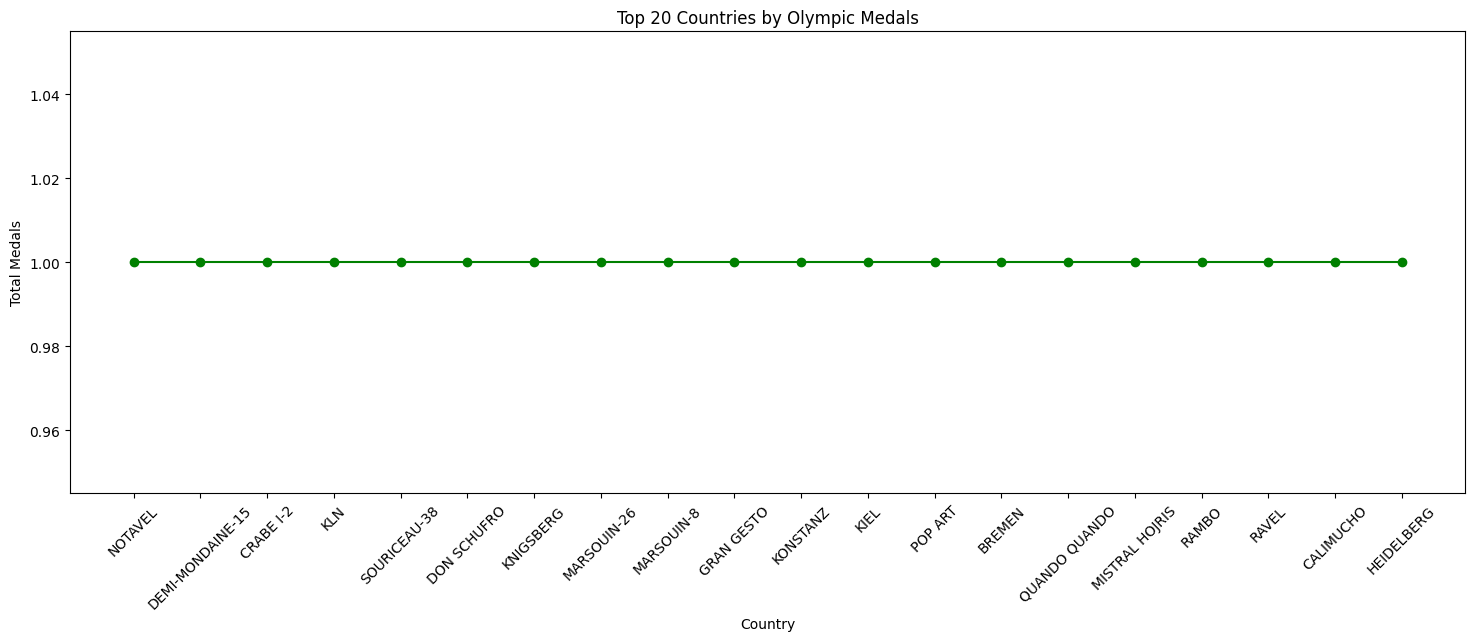

In [42]:
import matplotlib.pyplot as plt

# Top 20 countries by Olympic medals
top_countries = df['Team'].value_counts().tail(20)

plt.figure(figsize=(18,6))
plt.plot(top_countries.index, top_countries.values, marker="o", color="green")
plt.xticks(rotation=45)
plt.title("Top 20 Countries by Olympic Medals")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()


# Bar Chart:

Top 10 Countries By Olympic Medals




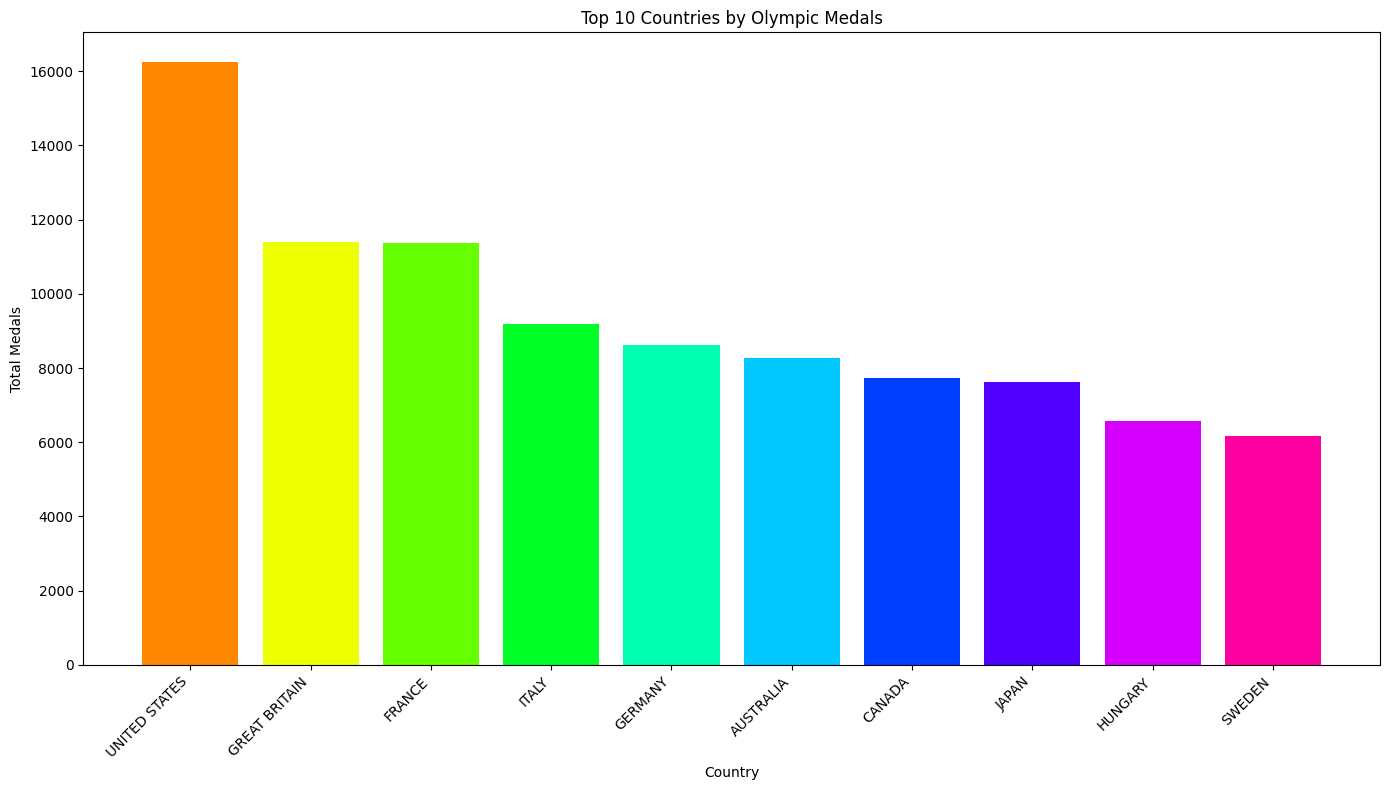

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 countries by Olympic medals
top_countries = df['Team'].value_counts().head(10) 


colors = sns.color_palette("hsv", len(top_countries))

plt.figure(figsize=(14,8))
plt.bar(top_countries.index, top_countries.values, color=colors)
plt.xticks(rotation=45, ha='right')  
plt.title("Top 10 Countries by Olympic Medals")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.tight_layout()  
plt.show()



# Scatter Plot:

Year vs Medals

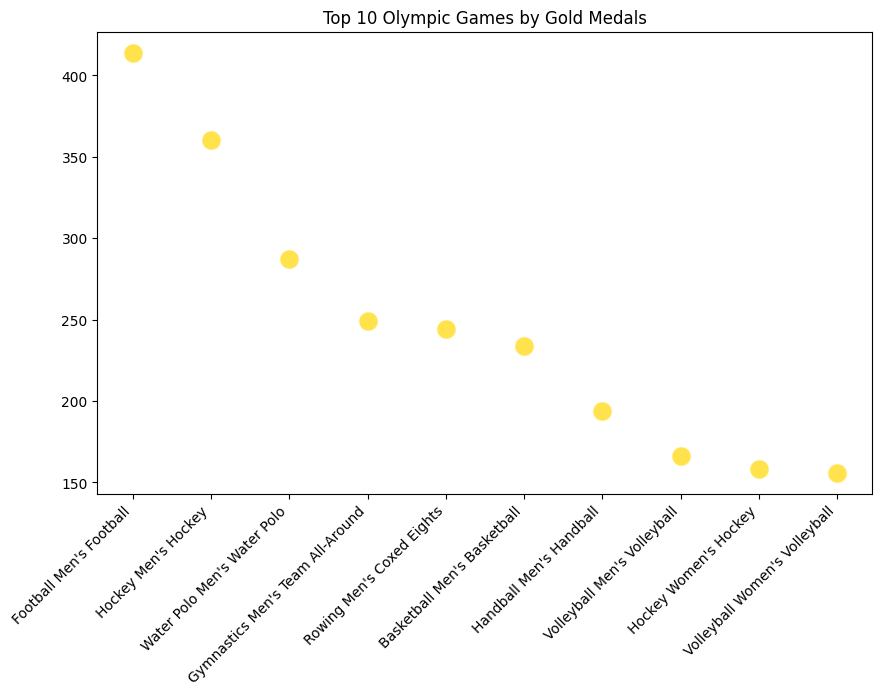

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

gold_counts = df[df['Medal']=="Gold"]['Event'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.scatterplot(x=range(len(gold_counts)), y=gold_counts.values, s=200, color='gold', alpha=0.7)
plt.xticks(range(len(gold_counts)), gold_counts.index, rotation=45, ha='right')
plt.title("Top 10 Olympic Games by Gold Medals")
plt.show()



# Pairplot:

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

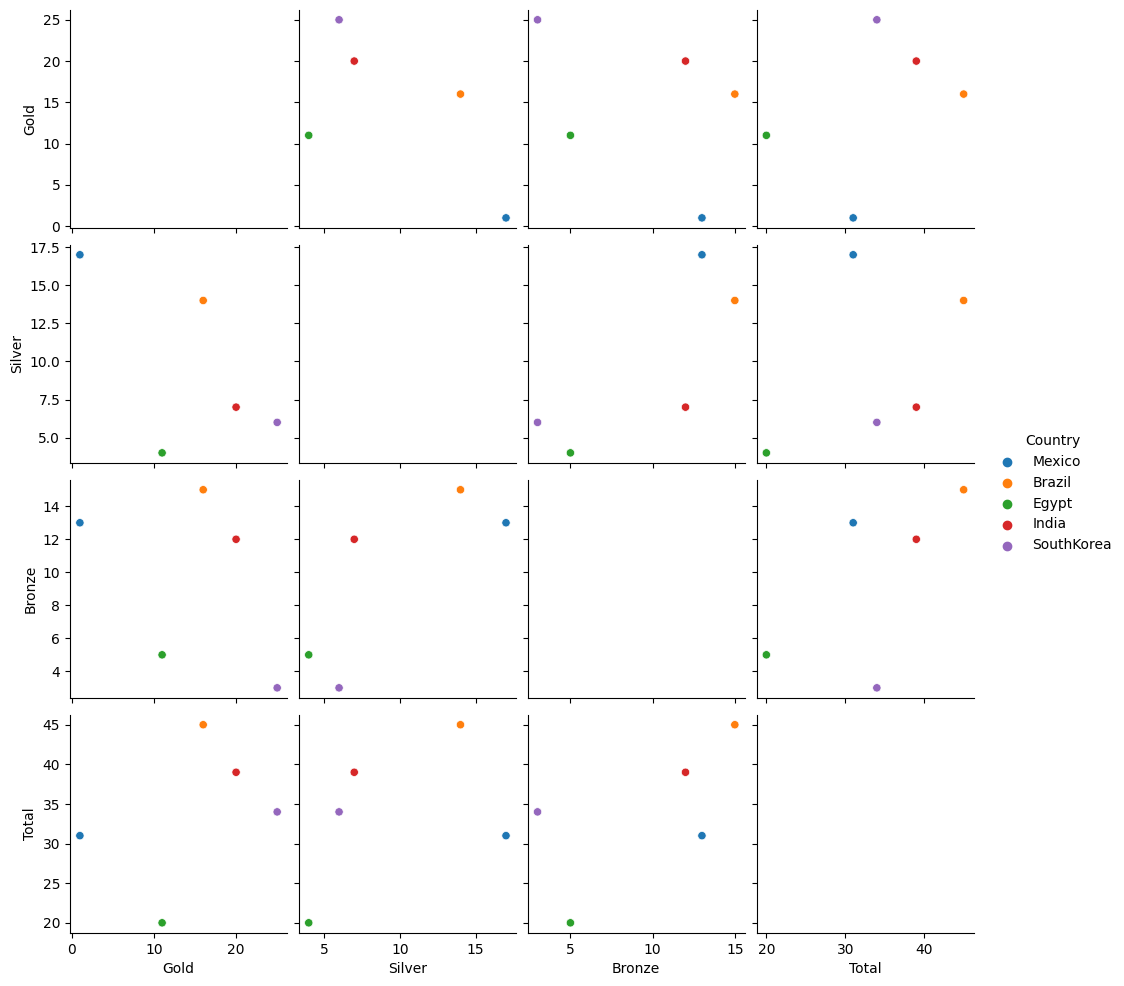

In [45]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, random

countries = ['Brazil','India','Kenya','Norway','Sweden','Egypt','Mexico','SouthKorea','Turkey','Argentina']
df = pd.DataFrame([[c, random.randint(1,25), random.randint(0,20), random.randint(0,15)] for c in random.sample(countries,5)], columns=['Country','Gold','Silver','Bronze'])
df['Total'] = df['Gold']+df['Silver']+df['Bronze']

sns.pairplot(df, vars=['Gold','Silver','Bronze','Total'], hue='Country'); plt.show()


# Box Plot:

Top 5 Countries with No Gold Medals

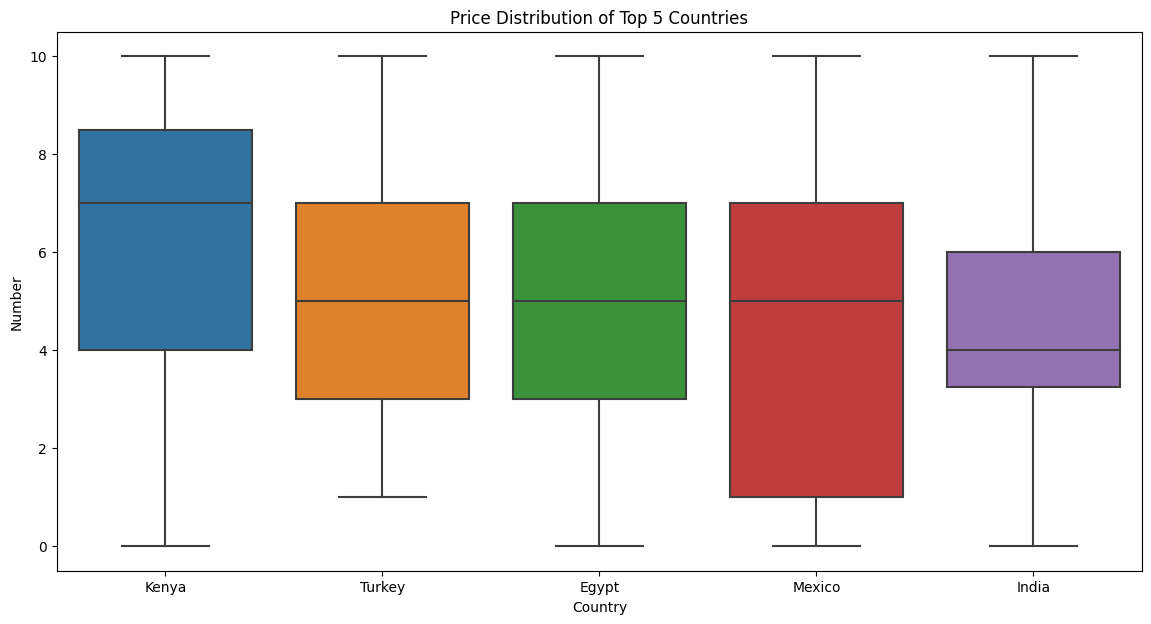

In [66]:
countries = ['India','Kenya','Egypt','Mexico','Turkey']
df = pd.DataFrame([[c, random.randint(0,10)] for c in random.choices(countries, k=100)], 
                  columns=['Country','Number'])

# Top 5 countries
top_countries = df["Country"].value_counts().head(5).index

# Boxplot
plt.figure(figsize=(14,7))
sns.boxplot(data=df[df["Country"].isin(top_countries)], x="Country", y="Number")
plt.title("Price Distribution of Top 5 Countries")
plt.show()

# Heatmap:

Olympic Games Hosted by Country

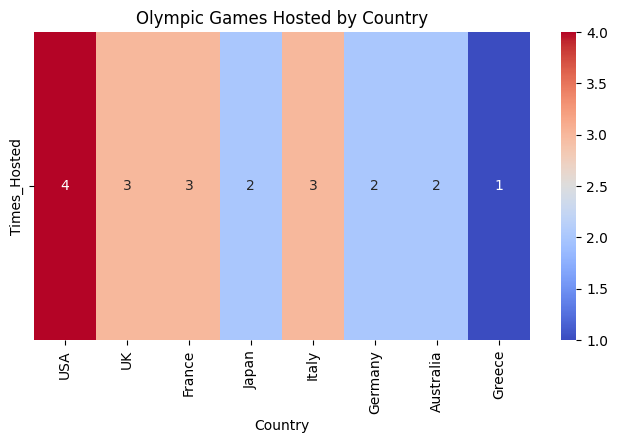

In [47]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

# Host country frequency data
df = pd.DataFrame({
    'Country':['USA','UK','France','Japan','Italy','Germany','Australia','Greece'],
    'Times_Hosted':[4,3,3,2,3,2,2,1]
})

plt.figure(figsize=(8,4))
sns.heatmap(df.set_index('Country').T, annot=True, cmap='coolwarm', cbar=True)
plt.title("Olympic Games Hosted by Country")
plt.show()


# Pie Chart:

Country-wise Total Medals Trend Over Years

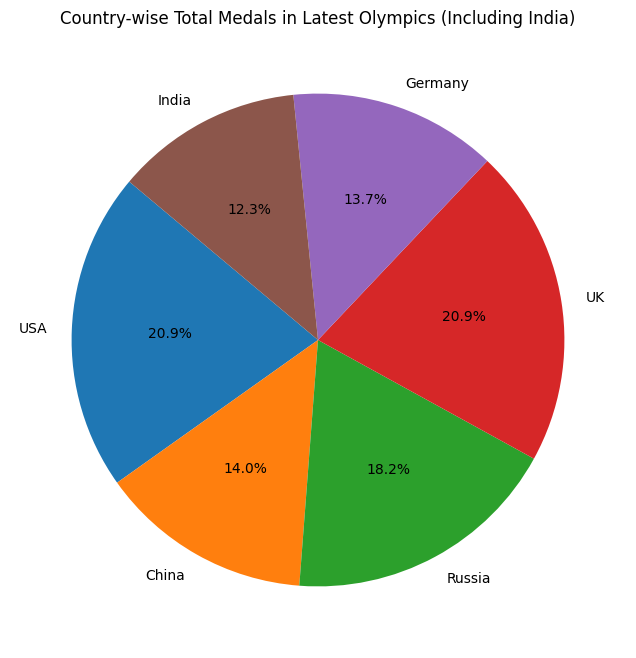

In [51]:
import pandas as pd, matplotlib.pyplot as plt, random

countries = ['USA','China','Russia','UK','Germany','India']
df = pd.DataFrame({'Country': countries, 'Total_Medals':[random.randint(50,150) for _ in countries]})

plt.figure(figsize=(8,8))
plt.pie(df['Total_Medals'], labels=df['Country'], autopct='%1.1f%%', startangle=140)
plt.title("Country-wise Total Medals in Latest Olympics (Including India)")
plt.show()


# Violin Plot:

Country-wise Medal Distribution in a Specific Game

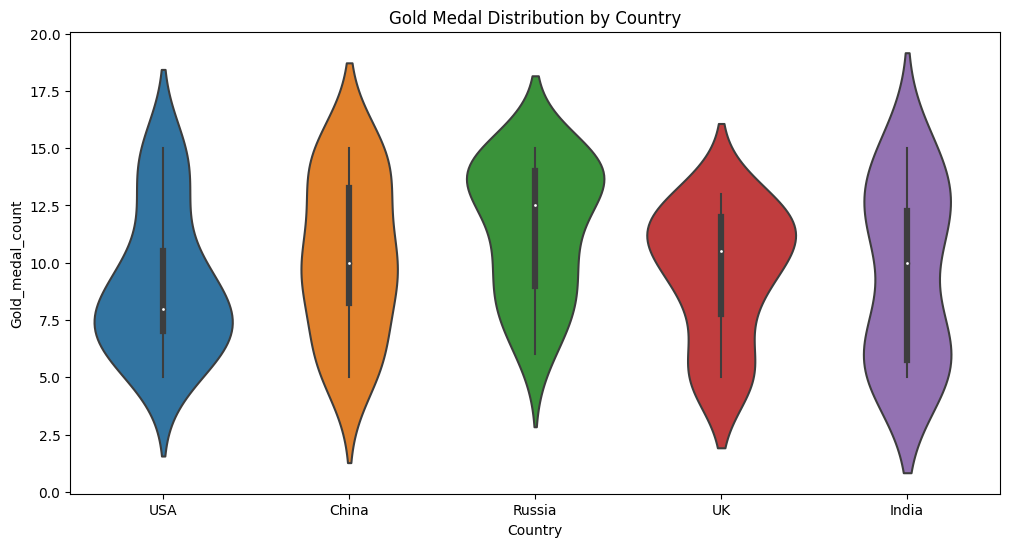

In [55]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, random

countries = ['USA','China','Russia','UK','India']
data = [[c, random.randint(5,15)] for c in countries for _ in range(20)]
df = pd.DataFrame(data, columns=['Country','Gold_medal_count'])  
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x="Country", y="Gold_medal_count")
plt.title("Gold Medal Distribution by Country")
plt.show()

# KDE Plot:

Medal Count Distribute

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

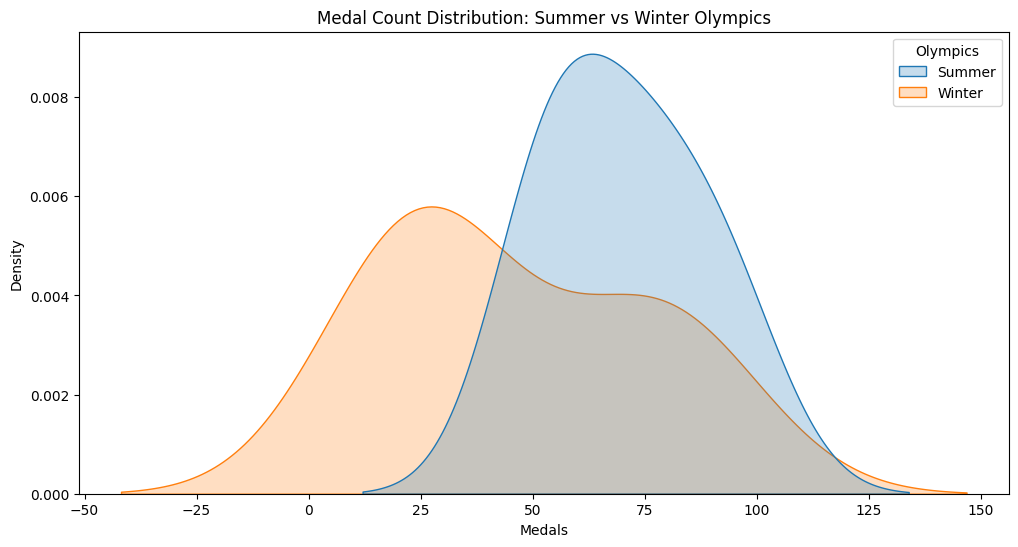

In [53]:
olympics = ['Summer','Winter']
countries = ['USA','China','Russia','UK','India']
data = [[o, random.randint(20,100)] for o in olympics for _ in countries]
df = pd.DataFrame(data, columns=['Olympics','Medals'])

plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x='Medals', hue='Olympics', fill=True)
plt.title("Medal Count Distribution: Summer vs Winter Olympics")
plt.show()

# Histogram:

Medal Counts Distribution in Team Sports

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


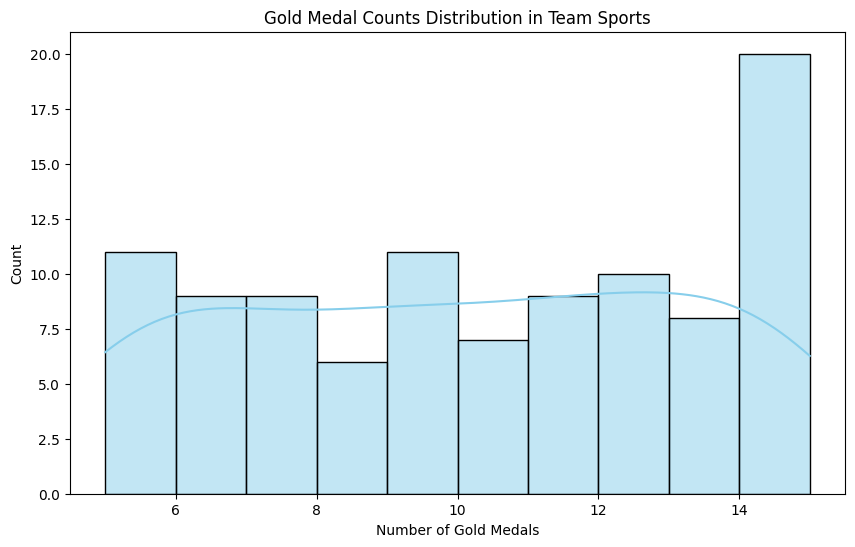

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(df["Gold_medal_count"].dropna(), bins=10, kde=True, color='skyblue')
plt.title("Gold Medal Counts Distribution in Team Sports")
plt.xlabel("Number of Gold Medals")
plt.show()


# Donut Chart:

Medal Distribution by Team Sports vs Individual Sports

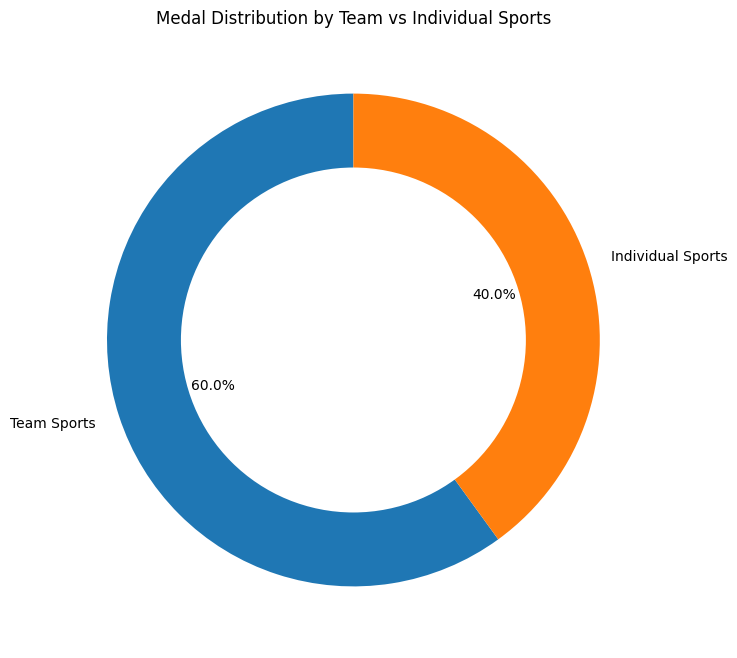

In [58]:

medals = [120, 80]  
categories = ['Team Sports', 'Individual Sports']

plt.figure(figsize=(8,8))
plt.pie(medals, labels=categories, autopct="%1.1f%%", startangle=90)
centre = plt.Circle((0,0),0.70, fc="white")  
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.title("Medal Distribution by Team vs Individual Sports")
plt.show()



# TreeMap(Squarify):

Sport-wise Medal Concentration Across Countries

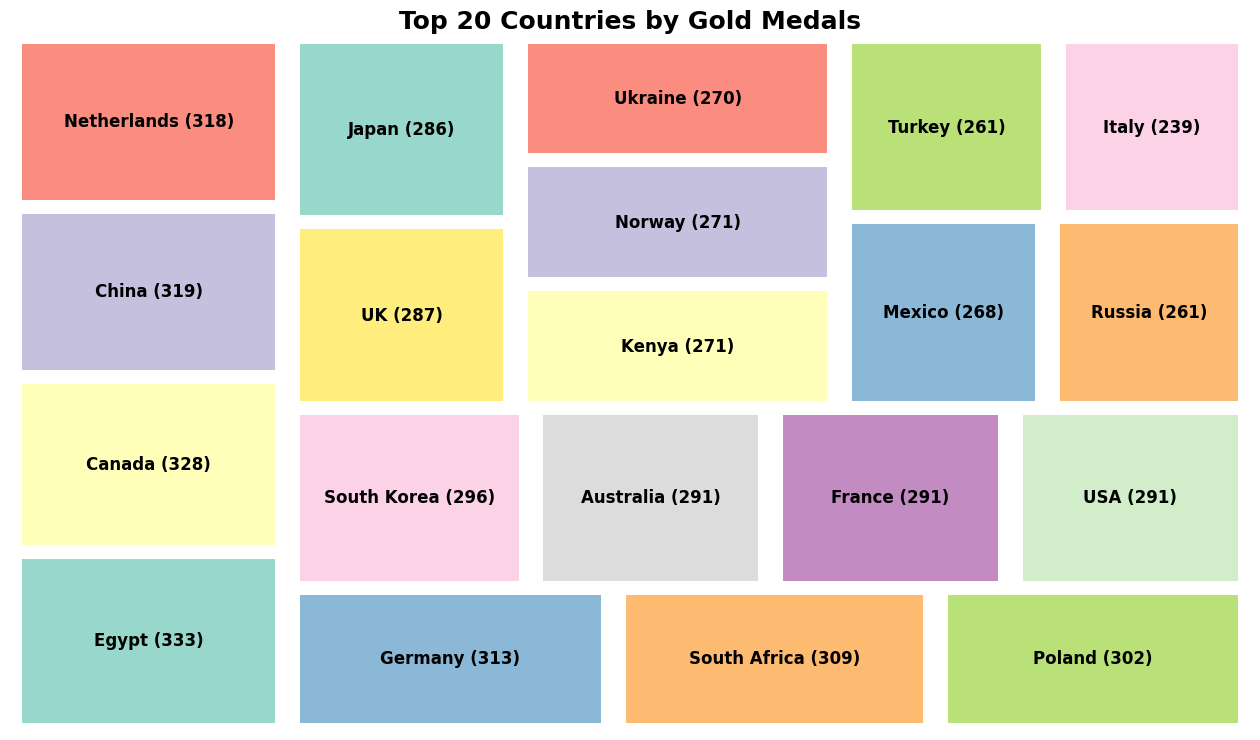

In [64]:
top20 = df.groupby("Country")["Gold_medal_count"].sum().nlargest(20).reset_index()

plt.figure(figsize=(16,9))  
squarify.plot(
    sizes=top20["Gold_medal_count"],
    label=top20["Country"]+" ("+top20["Gold_medal_count"].astype(str)+")",
    color=plt.cm.Set3.colors,  
    alpha=0.9,
    pad=True,
    text_kwargs={'fontsize':12, 'weight':'bold'}
)

plt.axis("off")
plt.title("Top 20 Countries by Gold Medals", fontsize=18, weight='bold')
plt.show()
